In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dataframe_image as dfi
from dbrepo.RestClient import RestClient

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

# Massage Data

For some reason dbrepo saves the columns names as lowercase, also some datatypes are wrong, lets fix this

In [47]:
client = RestClient(endpoint="https://test.dbrepo.tuwien.ac.at/", username='joachim.boltz', password='Q5dNSh5qp8v47jQ!')

size = client.get_table_data_count(database_id="f5fb6f43-4589-4c69-913a-23ee03f768b6",
                           table_id="3b24b225-8992-4c1c-958f-531ed6e9e4f6")

cdf = client.get_table_data(database_id="f5fb6f43-4589-4c69-913a-23ee03f768b6",
                           table_id="3b24b225-8992-4c1c-958f-531ed6e9e4f6", size=size)

capitalized_with_underscores = ['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']

cdf.columns = capitalized_with_underscores

dtype_dict = {'ID': 'int64',
 'Year_Birth': 'int64',
 'Education': 'object',
 'Marital_Status': 'object',
 'Income': 'float64',
 'Kidhome': 'int64',
 'Teenhome': 'int64',
 'Dt_Customer': 'object',
 'Recency': 'int64',
 'MntWines': 'int64',
 'MntFruits': 'int64',
 'MntMeatProducts': 'int64',
 'MntFishProducts': 'int64',
 'MntSweetProducts': 'int64',
 'MntGoldProds': 'int64',
 'NumDealsPurchases': 'int64',
 'NumWebPurchases': 'int64',
 'NumCatalogPurchases': 'int64',
 'NumStorePurchases': 'int64',
 'NumWebVisitsMonth': 'int64',
 'AcceptedCmp3': 'int64',
 'AcceptedCmp4': 'int64',
 'AcceptedCmp5': 'int64',
 'AcceptedCmp1': 'int64',
 'AcceptedCmp2': 'int64',
 'Complain': 'int64',
 'Z_CostContact': 'int64',
 'Z_Revenue': 'int64',
 'Response': 'int64'}

for col, dtype in dtype_dict.items():
    if col in cdf.columns and dtype.startswith('int'):
        cdf[col] = cdf[col].replace({'false': 0, 'true': 1})
        cdf[col] = pd.to_numeric(cdf[col], errors='raise')
        cdf[col] = cdf[col].astype(dtype)

cdf.head()

/var/folders/8m/w4j8scjd3c749wcktbcbr2280000gp/T/ipykernel_31442/1062961240.py:51: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cdf[col] = cdf[col].replace({'false': 0, 'true': 1})
/var/folders/8m/w4j8scjd3c749wcktbcbr2280000gp/T/ipykernel_31442/1062961240.py:51: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cdf[col] = cdf[col].replace({'false': 0, 'true': 1})
/var/folders/8m/w4j8scjd3c749wcktbcbr2280000gp/T/ipykernel_31442/1062961240.py:51: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a f

ID  Year_Birth   Education Marital_Status Income  Kidhome  Teenhome  \
0   0        1957  Graduation         Single  58138        0         0   
1   1        1954  Graduation         Single  46344        1         1   
2   2        1965  Graduation       Together  71613        0         0   
3   3        1984  Graduation       Together  26646        1         0   
4   4        1981         PhD        Married  58293        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-09-04       58       635         88              546              172   
1  2014-03-08       38        11          1                6                2   
2  2013-08-21       26       426         49              127              111   
3  2014-02-10       26        11          4               20               10   
4  2014-01-19       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0

In [48]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4   Income               2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [49]:
cdf.describe().T

count         mean         std     min      25%     50%  \
ID                   2240.0  1119.500000  646.776623     0.0   559.75  1119.5   
Year_Birth           2240.0  1968.805804   11.984069  1893.0  1959.00  1970.0   
Kidhome              2240.0     0.444196    0.538398     0.0     0.00     0.0   
Teenhome             2240.0     0.506250    0.544538     0.0     0.00     0.0   
Recency              2240.0    49.109375   28.962453     0.0    24.00    49.0   
MntWines             2240.0   303.935714  336.597393     0.0    23.75   173.5   
MntFruits            2240.0    26.302232   39.773434     0.0     1.00     8.0   
MntMeatProducts      2240.0   166.950000  225.715373     0.0    16.00    67.0   
MntFishProducts      2240.0    37.525446   54.628979     0.0     3.00    12.0   
MntSweetProducts     2240.0    27.062946   41.280498     0.0     1.00     8.0   
MntGoldProds         2240.0    44.021875   52.167439     0.0     9.00    24.0   
NumDealsPurchases    2240.0     2.325000    1.932238     0.0     1.00     2.0   
NumWebPurchases      2240.0     4.084821    2.778714     0.0     2.00     4.0   
NumCatalogPurchases  2240.0     2.662054    2.923101     0.0     0.00     2.0   
NumStorePurchases    2240.0     5.790179    3.250958     0.0     3.00     5.0   
NumWebVisitsMonth    2240.0     5.316518    2.426645     0.0     3.00     6.0   
AcceptedCmp3         2240.0     0.072768    0.259813     0.0     0.00     0.0   
AcceptedCmp4         2240.0     0.074554    0.262728     0.0     0.00     0.0   
AcceptedCmp5         2240.0     0.072768    0.259813     0.0     0.00     0.0   
AcceptedCmp1         2240.0     0.064286    0.245316     0.0     0.00     0.0   
AcceptedCmp2         2240.0     0.013393    0.114976     0.0     0.00     0.0   
Complain             2240.0     0.009375    0.096391     0.0     0.00     0.0   
Z_CostContact        2240.0     3.000000    0.000000     3.0     3.00     3.0   
Z_Revenue            2240.0    11.000000    0.000000    11.0    11.00    11.0   
Response             2240.0     0.149107    0.356274     0.0     0.00     0.0   

                         75%     max  
ID                   1679.25  2239.0  
Year_Birth           1977.00  1996.0  
Kidhome                 1.00     2.0  
Teenhome                1.00     2.0  
Recency                74.00    99.0  
MntWines              504.25  1493.0  
MntFruits              33.00   199.0  
MntMeatProducts       232.00  1725.0  
MntFishProducts        50.00   259.0  
MntSweetProducts       33.00   263.0  
MntGoldProds           56.00   362.0  
NumDealsPurchases       3.00    15.0  
NumWebPurchases         6.00    27.0  
NumCatalogPurchases     4.00    28.0  
NumStorePurchases       8.00    13.0  
NumWebVisitsMonth       7.00    20.0  
AcceptedCmp3            0.00     1.0  
AcceptedCmp4            0.00     1.0  
AcceptedCmp5            0.00     1.0  
AcceptedCmp1            0.00     1.0  
AcceptedCmp2            0.00     1.0  
Complain                0.00     1.0  
Z_CostContact           3.00     3.0  
Z_Revenue              11.00    11.0  
Response                0.00     1.0

In [50]:
statsdf = cdf.describe().T

dfi.export(statsdf, "attr_stats.png", table_conversion='matplotlib')

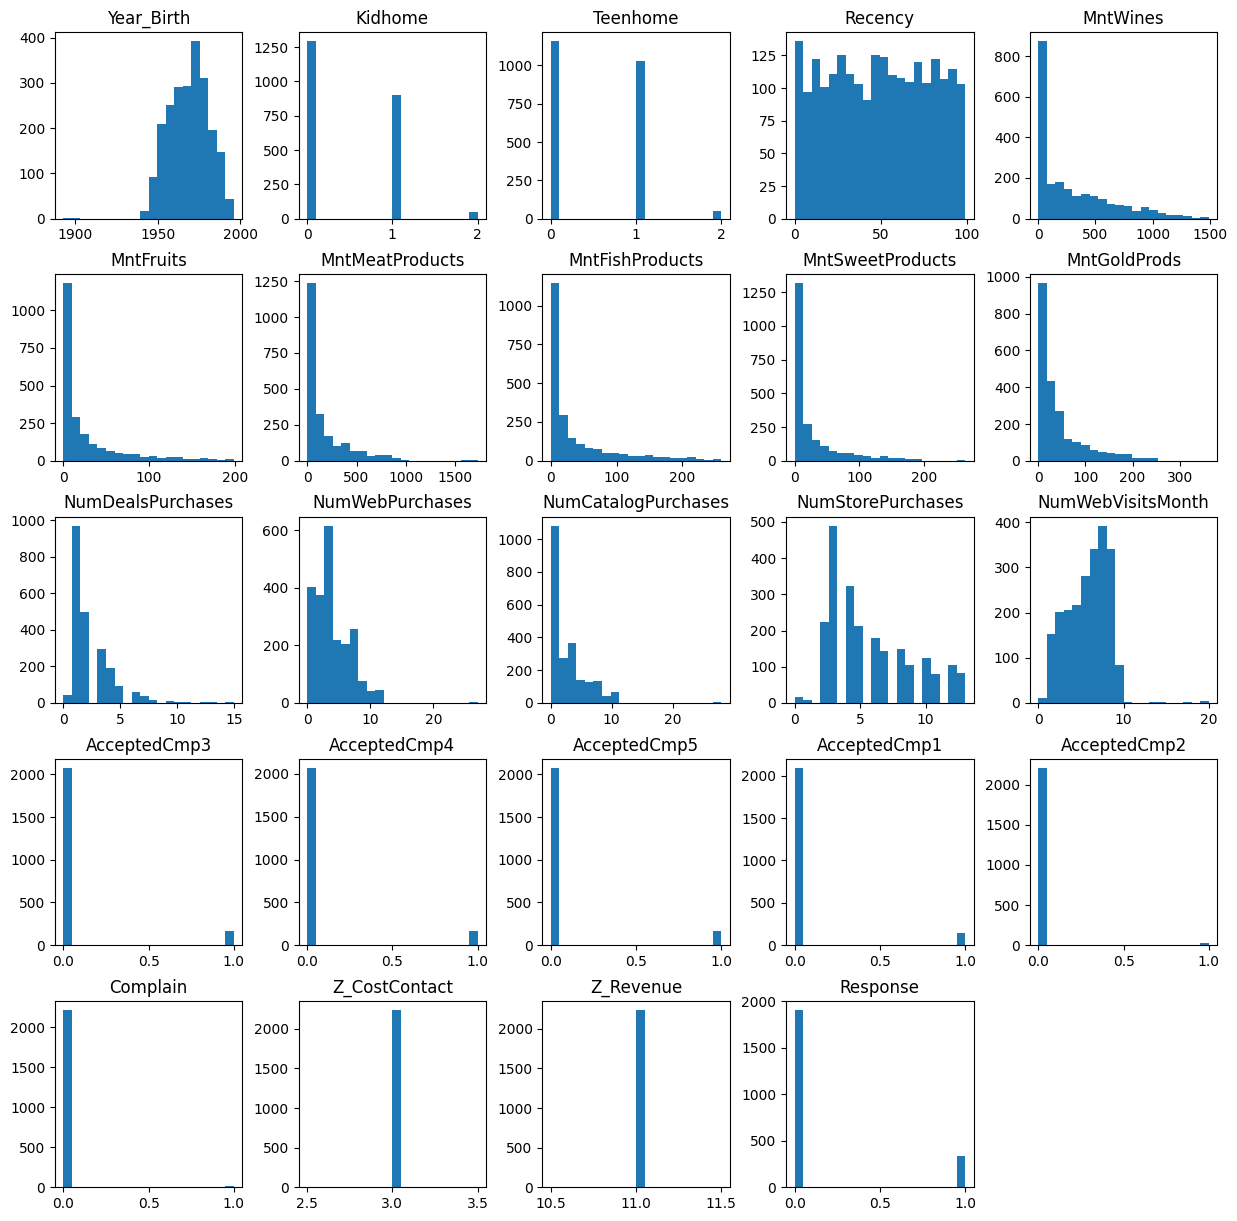

In [51]:
cdf.drop(columns="ID").hist(figsize=(15, 15), bins=20, grid=False)

plt.savefig('histograms.png')

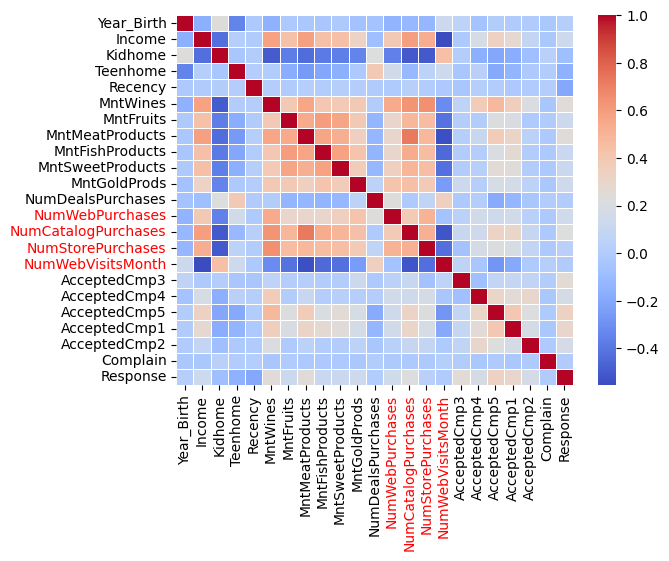

In [52]:
import seaborn as sns

corr = cdf.drop(columns=["ID", "Education", "Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue"]).corr()

ax = sns.heatmap(corr, annot=False, cmap='coolwarm', linewidths=0.5)

highlight_labels = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']  # Columns/Rows to highlight

# Customize x-axis labels
for label in ax.get_xticklabels():
    if label.get_text() in highlight_labels:
        label.set_color('red')

# Customize y-axis labels
for label in ax.get_yticklabels():
    if label.get_text() in highlight_labels:
        label.set_color('red')


plt.savefig('correlation.png', bbox_inches='tight')

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Separate the feature and target variable
X = cdf.drop(columns=["ID", "Education", "Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases", "NumWebVisitsMonth", "Education", "Year_Birth", "Marital_Status"]).dropna(subset=['Income'])[cdf['Income'] != 666666]
y = cdf.dropna(subset=['Income'])['NumWebPurchases'][cdf['Income'] != 666666]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Display the coefficients
print(f'Intercept: {model.intercept_}')
print(f'Coefficient: {model.coef_}')

Mean Squared Error: 3.8322211736932923
R-squared: 0.43875718145853326
Intercept: 1.5393873953650248
Coefficient: [ 8.66193711e-06 -6.62440626e-01  2.85476902e-01 -2.31518570e-04
  3.31595936e-03  1.45073550e-03 -1.50249927e-03  8.87171336e-04
  9.11806786e-03  9.01979825e-03  3.36407901e-01  2.46420768e-02
  1.37717654e-01 -7.39375387e-01  1.29382362e-01 -1.57997963e+00
  3.03006978e-01  4.52332072e-01]


/var/folders/8m/w4j8scjd3c749wcktbcbr2280000gp/T/ipykernel_31442/463533634.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X = cdf.drop(columns=["ID", "Education", "Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases", "NumWebVisitsMonth", "Education", "Year_Birth", "Marital_Status"]).dropna(subset=['Income'])[cdf['Income'] != 666666]


In [54]:
import statsmodels.api as sm
X_numeric = X.apply(pd.to_numeric, errors='coerce')
y_numeric = pd.to_numeric(y, errors='coerce')

model = sm.OLS(y_numeric, sm.add_constant(X_numeric)).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:        NumWebPurchases   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     100.6
Date:                Fri, 11 Apr 2025   Prob (F-statistic):          1.31e-270
Time:                        19:11:14   Log-Likelihood:                -4712.0
No. Observations:                2216   AIC:                             9462.
Df Residuals:                    2197   BIC:                             9570.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.5795      0.16

<Figure size 5000x5000 with 0 Axes>

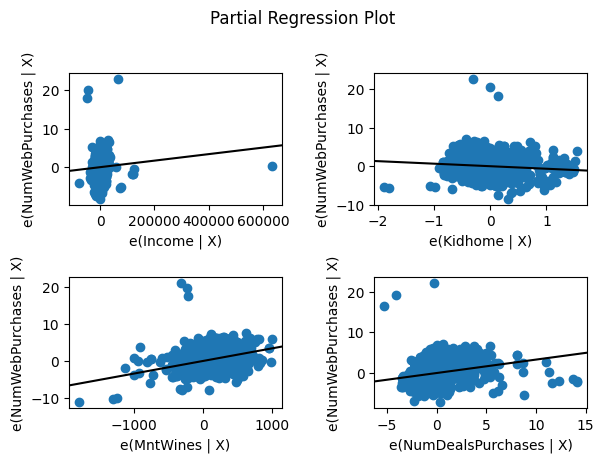

In [55]:
fig = plt.figure(figsize=(50, 50))
fig = sm.graphics.plot_partregress_grid(model, exog_idx=['Income', 'Kidhome', 'MntWines', 'NumDealsPurchases'])
fig.tight_layout(pad=2.0)

fig.savefig('regression.png', bbox_inches='tight')

In [56]:
# Extract summary statistics
params = model.params
conf = model.conf_int()
pvalues = model.pvalues
tvalues = model.tvalues

# Create a DataFrame to hold the summary
summary_df = pd.DataFrame({
    'Coefficient': params,
    'Std Error': model.bse,
    't-value': tvalues,
    'p-value': pvalues,
    'CI Lower Bound': conf[0],
    'CI Upper Bound': conf[1]
})

# Convert DataFrame to Markdown
markdown_table = summary_df.to_markdown()

# Print the Markdown table
print(markdown_table)

print(summary_df.to_latex())

|                   |   Coefficient |   Std Error |    t-value |     p-value |   CI Lower Bound |   CI Upper Bound |
|:------------------|--------------:|------------:|-----------:|------------:|-----------------:|-----------------:|
| const             |   1.57949     | 0.162222    |  9.73663   | 5.80765e-22 |      1.26137     |      1.89762     |
| Income            |   8.47293e-06 | 2.38741e-06 |  3.54901   | 0.000394801 |      3.79112e-06 |      1.31547e-05 |
| Kidhome           |  -0.656042    | 0.104736    | -6.26375   | 4.50798e-10 |     -0.861435    |     -0.450649    |
| Teenhome          |   0.29108     | 0.0958794   |  3.0359    | 0.00242639  |      0.103056    |      0.479103    |
| Recency           |  -0.000304957 | 0.00153873  | -0.198187  | 0.842917    |     -0.00332248  |      0.00271257  |
| MntWines          |   0.00342682  | 0.000201528 | 17.0042    | 5.15136e-61 |      0.00303161  |      0.00382202  |
| MntFruits         |   0.00255749  | 0.00150873  |  1.69512   |

# Save images to TUWRD

In [ ]:
# token = "eW4g3p5TRi9DGisduP8g2hozhHJ1Unjc33SEtNgCV7TY9NQzOnffeKmHikvj"

import requests
url = "https://test.researchdata.tuwien.at/api/records"
headers = {
    "Authorization": f"Bearer {token}",
    "Content-Type": "application/json"
}
data = {
    "metadata": {
        "creators": [
            {
                "person_or_org": {
                    "family_name": "Boltz",
                    "given_name": "Joachim",
                    "type": "personal",
                }
            }
        ],
        "publication_date": "2025-04-12",
        "publisher": "TU Wien",
        "resource_type": {"id": "dataset"},
        "title": "DAST Customer Analysis",
    },
    "files": {"enabled": True},
}

response = requests.post(url, json=data, headers=headers)
print(response.json())

myid = response['id']

{'id': '32sms-w5z07', 'created': '2025-04-12T11:02:59.668615+00:00', 'updated': '2025-04-12T11:02:59.691448+00:00', 'links': {'self': 'https://test.researchdata.tuwien.at/api/records/32sms-w5z07/draft', 'self_html': 'https://test.researchdata.tuwien.at/uploads/32sms-w5z07', 'self_iiif_manifest': 'https://test.researchdata.tuwien.at/api/iiif/draft:32sms-w5z07/manifest', 'self_iiif_sequence': 'https://test.researchdata.tuwien.at/api/iiif/draft:32sms-w5z07/sequence/default', 'files': 'https://test.researchdata.tuwien.at/api/records/32sms-w5z07/draft/files', 'media_files': 'https://test.researchdata.tuwien.at/api/records/32sms-w5z07/draft/media-files', 'record': 'https://test.researchdata.tuwien.at/api/records/32sms-w5z07', 'record_html': 'https://test.researchdata.tuwien.at/records/32sms-w5z07', 'publish': 'https://test.researchdata.tuwien.at/api/records/32sms-w5z07/draft/actions/publish', 'review': 'https://test.researchdata.tuwien.at/api/records/32sms-w5z07/draft/review', 'versions': 'h

{'id': '32sms-w5z07', 'created': '2025-04-12T11:02:59.668615+00:00', 'updated': '2025-04-12T11:02:59.691448+00:00', 'links': {'self': 'https://test.researchdata.tuwien.at/api/records/32sms-w5z07/draft', 'self_html': 'https://test.researchdata.tuwien.at/uploads/32sms-w5z07', 'self_iiif_manifest': 'https://test.researchdata.tuwien.at/api/iiif/draft:32sms-w5z07/manifest', 'self_iiif_sequence': 'https://test.researchdata.tuwien.at/api/iiif/draft:32sms-w5z07/sequence/default', 'files': 'https://test.researchdata.tuwien.at/api/records/32sms-w5z07/draft/files', 'media_files': 'https://test.researchdata.tuwien.at/api/records/32sms-w5z07/draft/media-files', 'record': 'https://test.researchdata.tuwien.at/api/records/32sms-w5z07', 'record_html': 'https://test.researchdata.tuwien.at/records/32sms-w5z07', 'publish': 'https://test.researchdata.tuwien.at/api/records/32sms-w5z07/draft/actions/publish', 'review': 'https://test.researchdata.tuwien.at/api/records/32sms-w5z07/draft/review', 'versions': 'https://test.researchdata.tuwien.at/api/records/32sms-w5z07/versions', 'access_links': 'https://test.researchdata.tuwien.at/api/records/32sms-w5z07/access/links', 'access_grants': 'https://test.researchdata.tuwien.at/api/records/32sms-w5z07/access/grants', 'access_users': 'https://test.researchdata.tuwien.at/api/records/32sms-w5z07/access/users', 'access_request': 'https://test.researchdata.tuwien.at/api/records/32sms-w5z07/access/request', 'access': 'https://test.researchdata.tuwien.at/api/records/32sms-w5z07/access', 'reserve_doi': 'https://test.researchdata.tuwien.at/api/records/32sms-w5z07/draft/pids/doi', 'communities': 'https://test.researchdata.tuwien.at/api/records/32sms-w5z07/communities', 'communities-suggestions': 'https://test.researchdata.tuwien.at/api/records/32sms-w5z07/communities-suggestions', 'requests': 'https://test.researchdata.tuwien.at/api/records/32sms-w5z07/requests'}, 'revision_id': 5, 'parent': {'id': '1sz01-p8f18', 'access': {'grants': [], 'owned_by': {'user': '272'}, 'links': [], 'settings': {'allow_user_requests': True, 'allow_guest_requests': True, 'accept_conditions_text': None, 'secret_link_expiration': 30}}, 'communities': {}, 'pids': {}}, 'versions': {'is_latest': False, 'is_latest_draft': True, 'index': 1}, 'is_published': False, 'is_draft': True, 'expires_at': '2025-04-12 11:02:59.668636', 'pids': {}, 'metadata': {'resource_type': {'id': 'dataset', 'title': {'de': 'Datensatz', 'en': 'Dataset'}}, 'creators': [{'person_or_org': {'type': 'personal', 'name': 'Boltz, Joachim', 'given_name': 'Joachim', 'family_name': 'Boltz'}}], 'title': 'DAST Customer Analysis', 'publisher': 'TU Wien', 'publication_date': '2025-04-12'}, 'custom_fields': {}, 'access': {'record': 'public', 'files': 'public', 'embargo': {'active': False, 'reason': None}, 'status': 'metadata-only'}, 'files': {'enabled': True, 'order': [], 'count': 0, 'total_bytes': 0, 'entries': {}}, 'media_files': {'enabled': False, 'order': [], 'count': 0, 'total_bytes': 0, 'entries': {}}, 'status': 'draft'}

In [ ]:
url = "https://test.researchdata.tuwien.at/api/records/32sms-w5z07/draft/pids/doi"

response = requests.post(url, headers=headers)
print(response.json())

{'id': '32sms-w5z07', 'created': '2025-04-12T11:02:59.668615+00:00', 'updated': '2025-04-12T11:05:55.833542+00:00', 'links': {'self': 'https://test.researchdata.tuwien.at/api/records/32sms-w5z07/draft', 'self_html': 'https://test.researchdata.tuwien.at/uploads/32sms-w5z07', 'doi': 'https://handle.stage.datacite.org/10.70124/32sms-w5z07', 'self_iiif_manifest': 'https://test.researchdata.tuwien.at/api/iiif/draft:32sms-w5z07/manifest', 'self_iiif_sequence': 'https://test.researchdata.tuwien.at/api/iiif/draft:32sms-w5z07/sequence/default', 'files': 'https://test.researchdata.tuwien.at/api/records/32sms-w5z07/draft/files', 'media_files': 'https://test.researchdata.tuwien.at/api/records/32sms-w5z07/draft/media-files', 'record': 'https://test.researchdata.tuwien.at/api/records/32sms-w5z07', 'record_html': 'https://test.researchdata.tuwien.at/records/32sms-w5z07', 'publish': 'https://test.researchdata.tuwien.at/api/records/32sms-w5z07/draft/actions/publish', 'review': 'https://test.researchdat

{'id': '32sms-w5z07', 'created': '2025-04-12T11:02:59.668615+00:00', 'updated': '2025-04-12T11:05:55.833542+00:00', 'links': {'self': 'https://test.researchdata.tuwien.at/api/records/32sms-w5z07/draft', 'self_html': 'https://test.researchdata.tuwien.at/uploads/32sms-w5z07', 'doi': 'https://handle.stage.datacite.org/10.70124/32sms-w5z07', 'self_iiif_manifest': 'https://test.researchdata.tuwien.at/api/iiif/draft:32sms-w5z07/manifest', 'self_iiif_sequence': 'https://test.researchdata.tuwien.at/api/iiif/draft:32sms-w5z07/sequence/default', 'files': 'https://test.researchdata.tuwien.at/api/records/32sms-w5z07/draft/files', 'media_files': 'https://test.researchdata.tuwien.at/api/records/32sms-w5z07/draft/media-files', 'record': 'https://test.researchdata.tuwien.at/api/records/32sms-w5z07', 'record_html': 'https://test.researchdata.tuwien.at/records/32sms-w5z07', 'publish': 'https://test.researchdata.tuwien.at/api/records/32sms-w5z07/draft/actions/publish', 'review': 'https://test.researchdata.tuwien.at/api/records/32sms-w5z07/draft/review', 'versions': 'https://test.researchdata.tuwien.at/api/records/32sms-w5z07/versions', 'access_links': 'https://test.researchdata.tuwien.at/api/records/32sms-w5z07/access/links', 'access_grants': 'https://test.researchdata.tuwien.at/api/records/32sms-w5z07/access/grants', 'access_users': 'https://test.researchdata.tuwien.at/api/records/32sms-w5z07/access/users', 'access_request': 'https://test.researchdata.tuwien.at/api/records/32sms-w5z07/access/request', 'access': 'https://test.researchdata.tuwien.at/api/records/32sms-w5z07/access', 'reserve_doi': 'https://test.researchdata.tuwien.at/api/records/32sms-w5z07/draft/pids/doi', 'communities': 'https://test.researchdata.tuwien.at/api/records/32sms-w5z07/communities', 'communities-suggestions': 'https://test.researchdata.tuwien.at/api/records/32sms-w5z07/communities-suggestions', 'requests': 'https://test.researchdata.tuwien.at/api/records/32sms-w5z07/requests'}, 'revision_id': 7, 'parent': {'id': '1sz01-p8f18', 'access': {'grants': [], 'owned_by': {'user': '272'}, 'links': [], 'settings': {'allow_user_requests': True, 'allow_guest_requests': True, 'accept_conditions_text': None, 'secret_link_expiration': 30}}, 'communities': {}, 'pids': {}}, 'versions': {'is_latest': False, 'is_latest_draft': True, 'index': 1}, 'is_published': False, 'is_draft': True, 'expires_at': '2025-04-12 11:02:59.668636', 'pids': {'doi': {'identifier': '10.70124/32sms-w5z07', 'provider': 'datacite', 'client': 'datacite'}}, 'metadata': {'resource_type': {'id': 'dataset', 'title': {'de': 'Datensatz', 'en': 'Dataset'}}, 'creators': [{'person_or_org': {'type': 'personal', 'name': 'Boltz, Joachim', 'given_name': 'Joachim', 'family_name': 'Boltz'}}], 'title': 'DAST Customer Analysis', 'publisher': 'TU Wien', 'publication_date': '2025-04-12'}, 'custom_fields': {}, 'access': {'record': 'public', 'files': 'public', 'embargo': {'active': False, 'reason': None}, 'status': 'open'}, 'files': {'enabled': True, 'order': [], 'count': 0, 'total_bytes': 0, 'entries': {}}, 'media_files': {'enabled': False, 'order': [], 'count': 0, 'total_bytes': 0, 'entries': {}}, 'status': 'draft'}

In [7]:
url = "https://test.researchdata.tuwien.at/api/records/32sms-w5z07/draft/files"


data = [
    {
        "key": "histograms.png"
    }
]

response = requests.post(url, json=data, headers=headers)
print(response.json())



{'enabled': True, 'links': {'self': 'https://test.researchdata.tuwien.at/api/records/32sms-w5z07/draft/files'}, 'entries': [{'key': 'histograms.png', 'created': '2025-04-12T11:12:19.226414+00:00', 'updated': '2025-04-12T11:12:19.228935+00:00', 'status': 'pending', 'metadata': None, 'access': {'hidden': False}, 'links': {'self': 'https://test.researchdata.tuwien.at/api/records/32sms-w5z07/draft/files/histograms.png', 'content': 'https://test.researchdata.tuwien.at/api/records/32sms-w5z07/draft/files/histograms.png/content', 'commit': 'https://test.researchdata.tuwien.at/api/records/32sms-w5z07/draft/files/histograms.png/commit', 'iiif_canvas': 'https://test.researchdata.tuwien.at/api/iiif/draft:32sms-w5z07/canvas/histograms.png', 'iiif_base': 'https://test.researchdata.tuwien.at/api/iiif/draft:32sms-w5z07:histograms.png', 'iiif_info': 'https://test.researchdata.tuwien.at/api/iiif/draft:32sms-w5z07:histograms.png/info.json', 'iiif_api': 'https://test.researchdata.tuwien.at/api/iiif/draft

In [12]:
url = "https://test.researchdata.tuwien.at/api/records/32sms-w5z07/draft/files/histograms.png/content"

headers = {
    "Authorization": f"Bearer {token}",
    "Content-Type": "application/octet-stream"
}

with open("histograms.png", "rb") as file_data:
    response = requests.put(url, headers=headers, data=file_data)

print(response.json())

{'key': 'histograms.png', 'created': '2025-04-12T11:12:19.226414+00:00', 'updated': '2025-04-12T11:12:19.228935+00:00', 'status': 'pending', 'metadata': None, 'access': {'hidden': False}, 'links': {'self': 'https://test.researchdata.tuwien.at/api/records/32sms-w5z07/draft/files/histograms.png', 'content': 'https://test.researchdata.tuwien.at/api/records/32sms-w5z07/draft/files/histograms.png/content', 'commit': 'https://test.researchdata.tuwien.at/api/records/32sms-w5z07/draft/files/histograms.png/commit', 'iiif_canvas': 'https://test.researchdata.tuwien.at/api/iiif/draft:32sms-w5z07/canvas/histograms.png', 'iiif_base': 'https://test.researchdata.tuwien.at/api/iiif/draft:32sms-w5z07:histograms.png', 'iiif_info': 'https://test.researchdata.tuwien.at/api/iiif/draft:32sms-w5z07:histograms.png/info.json', 'iiif_api': 'https://test.researchdata.tuwien.at/api/iiif/draft:32sms-w5z07:histograms.png/full/full/0/default.png'}}


In [14]:
url = "https://test.researchdata.tuwien.at/api/records/32sms-w5z07/draft/files"

headers = {
    "Authorization": f"Bearer {token}",
    "Content-Type": "application/json"
}

data = [
    {
        "key": "correlation.png"
    }
]

response = requests.post(url, json=data, headers=headers)
print(response.json())



{'enabled': True, 'links': {'self': 'https://test.researchdata.tuwien.at/api/records/32sms-w5z07/draft/files'}, 'entries': [{'key': 'histograms.png', 'created': '2025-04-12T11:12:19.226414+00:00', 'updated': '2025-04-12T11:12:19.228935+00:00', 'status': 'pending', 'metadata': None, 'access': {'hidden': False}, 'links': {'self': 'https://test.researchdata.tuwien.at/api/records/32sms-w5z07/draft/files/histograms.png', 'content': 'https://test.researchdata.tuwien.at/api/records/32sms-w5z07/draft/files/histograms.png/content', 'commit': 'https://test.researchdata.tuwien.at/api/records/32sms-w5z07/draft/files/histograms.png/commit', 'iiif_canvas': 'https://test.researchdata.tuwien.at/api/iiif/draft:32sms-w5z07/canvas/histograms.png', 'iiif_base': 'https://test.researchdata.tuwien.at/api/iiif/draft:32sms-w5z07:histograms.png', 'iiif_info': 'https://test.researchdata.tuwien.at/api/iiif/draft:32sms-w5z07:histograms.png/info.json', 'iiif_api': 'https://test.researchdata.tuwien.at/api/iiif/draft

In [15]:
url = "https://test.researchdata.tuwien.at/api/records/32sms-w5z07/draft/files/correlation.png/content"

headers = {
    "Authorization": f"Bearer {token}",
    "Content-Type": "application/octet-stream"
}

with open("correlation.png", "rb") as file_data:
    response = requests.put(url, headers=headers, data=file_data)

print(response.json())

{'key': 'correlation.png', 'created': '2025-04-12T11:17:40.798870+00:00', 'updated': '2025-04-12T11:17:40.800430+00:00', 'status': 'pending', 'metadata': None, 'access': {'hidden': False}, 'links': {'self': 'https://test.researchdata.tuwien.at/api/records/32sms-w5z07/draft/files/correlation.png', 'content': 'https://test.researchdata.tuwien.at/api/records/32sms-w5z07/draft/files/correlation.png/content', 'commit': 'https://test.researchdata.tuwien.at/api/records/32sms-w5z07/draft/files/correlation.png/commit', 'iiif_canvas': 'https://test.researchdata.tuwien.at/api/iiif/draft:32sms-w5z07/canvas/correlation.png', 'iiif_base': 'https://test.researchdata.tuwien.at/api/iiif/draft:32sms-w5z07:correlation.png', 'iiif_info': 'https://test.researchdata.tuwien.at/api/iiif/draft:32sms-w5z07:correlation.png/info.json', 'iiif_api': 'https://test.researchdata.tuwien.at/api/iiif/draft:32sms-w5z07:correlation.png/full/full/0/default.png'}}


In [16]:
url = "https://test.researchdata.tuwien.at/api/records/32sms-w5z07/draft/files"

headers = {
    "Authorization": f"Bearer {token}",
    "Content-Type": "application/json"
}

data = [
    {
        "key": "regression.png"
    }
]

response = requests.post(url, json=data, headers=headers)
print(response.json())


{'enabled': True, 'links': {'self': 'https://test.researchdata.tuwien.at/api/records/32sms-w5z07/draft/files'}, 'entries': [{'key': 'histograms.png', 'created': '2025-04-12T11:12:19.226414+00:00', 'updated': '2025-04-12T11:12:19.228935+00:00', 'status': 'pending', 'metadata': None, 'access': {'hidden': False}, 'links': {'self': 'https://test.researchdata.tuwien.at/api/records/32sms-w5z07/draft/files/histograms.png', 'content': 'https://test.researchdata.tuwien.at/api/records/32sms-w5z07/draft/files/histograms.png/content', 'commit': 'https://test.researchdata.tuwien.at/api/records/32sms-w5z07/draft/files/histograms.png/commit', 'iiif_canvas': 'https://test.researchdata.tuwien.at/api/iiif/draft:32sms-w5z07/canvas/histograms.png', 'iiif_base': 'https://test.researchdata.tuwien.at/api/iiif/draft:32sms-w5z07:histograms.png', 'iiif_info': 'https://test.researchdata.tuwien.at/api/iiif/draft:32sms-w5z07:histograms.png/info.json', 'iiif_api': 'https://test.researchdata.tuwien.at/api/iiif/draft

In [17]:
url = "https://test.researchdata.tuwien.at/api/records/32sms-w5z07/draft/files/regression.png/content"

headers = {
    "Authorization": f"Bearer {token}",
    "Content-Type": "application/octet-stream"
}

with open("regression.png", "rb") as file_data:
    response = requests.put(url, headers=headers, data=file_data)

print(response.json())

{'key': 'regression.png', 'created': '2025-04-12T11:19:22.865576+00:00', 'updated': '2025-04-12T11:19:22.866788+00:00', 'status': 'pending', 'metadata': None, 'access': {'hidden': False}, 'links': {'self': 'https://test.researchdata.tuwien.at/api/records/32sms-w5z07/draft/files/regression.png', 'content': 'https://test.researchdata.tuwien.at/api/records/32sms-w5z07/draft/files/regression.png/content', 'commit': 'https://test.researchdata.tuwien.at/api/records/32sms-w5z07/draft/files/regression.png/commit', 'iiif_canvas': 'https://test.researchdata.tuwien.at/api/iiif/draft:32sms-w5z07/canvas/regression.png', 'iiif_base': 'https://test.researchdata.tuwien.at/api/iiif/draft:32sms-w5z07:regression.png', 'iiif_info': 'https://test.researchdata.tuwien.at/api/iiif/draft:32sms-w5z07:regression.png/info.json', 'iiif_api': 'https://test.researchdata.tuwien.at/api/iiif/draft:32sms-w5z07:regression.png/full/full/0/default.png'}}


In [18]:

import requests
url = "https://test.researchdata.tuwien.at/api/records/32sms-w5z07/draft/files/histograms.png/commit"
headers = {
    "Authorization": f"Bearer {token}",
    "Content-Type": "application/json"
}

response = requests.post(url, headers=headers)
print(response.json())

url = "https://test.researchdata.tuwien.at/api/records/32sms-w5z07/draft/files/correlation.png/commit"
headers = {
    "Authorization": f"Bearer {token}",
    "Content-Type": "application/json"
}

response = requests.post(url, headers=headers)
print(response.json())

url = "https://test.researchdata.tuwien.at/api/records/32sms-w5z07/draft/files/regression.png/commit"
headers = {
    "Authorization": f"Bearer {token}",
    "Content-Type": "application/json"
}

response = requests.post(url, headers=headers)
print(response.json())

{'key': 'histograms.png', 'storage_class': 'L', 'checksum': 'md5:304a066931c23cf7188081953f12e7da', 'size': 106893, 'created': '2025-04-12T11:12:19.226414+00:00', 'updated': '2025-04-12T11:34:06.675109+00:00', 'status': 'completed', 'mimetype': 'image/png', 'version_id': '5bb174eb-e2d6-4a02-a9fb-b33845536c28', 'file_id': 'f8e87a8f-e8c8-431d-9c84-6883862bccca', 'bucket_id': 'e493fffb-d715-4210-b9d0-ad63b436733a', 'metadata': None, 'access': {'hidden': False}, 'links': {'self': 'https://test.researchdata.tuwien.at/api/records/32sms-w5z07/draft/files/histograms.png', 'content': 'https://test.researchdata.tuwien.at/api/records/32sms-w5z07/draft/files/histograms.png/content', 'commit': 'https://test.researchdata.tuwien.at/api/records/32sms-w5z07/draft/files/histograms.png/commit', 'iiif_canvas': 'https://test.researchdata.tuwien.at/api/iiif/draft:32sms-w5z07/canvas/histograms.png', 'iiif_base': 'https://test.researchdata.tuwien.at/api/iiif/draft:32sms-w5z07:histograms.png', 'iiif_info': 'ht